**Classification** problems are a broad category of machine learning problems that involve the prediction of values taken from a discrete, finite number of cases. 

In this example, we'll build a classifier to predict to which species a flower belongs to.

## Reading data

In [1]:
import pandas as pd

iris = pd.read_csv('../datasets/iris.csv')

In [2]:
# Print some info and statistics about the dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal_length    150 non-null float64
Sepal_width     150 non-null float64
Petal_length    150 non-null float64
Petal_width     150 non-null float64
Class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [3]:
iris.Class.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
iris.describe()

,Sepal_length,Sepal_width,Petal_length,Petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Encode the classes to numeric values
class_encodings = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

iris.Class = iris.Class.map(class_encodings)

In [6]:
iris.Class.unique()

array([0, 1, 2])

## Visualizing data

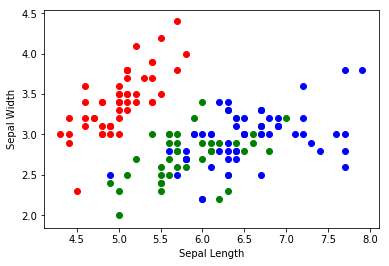

In [7]:
# Create a scatterplot for sepal length and sepal width
import matplotlib.pyplot as plt
%matplotlib inline

sl = iris.Sepal_length
sw = iris.Sepal_width

# Create a scatterplot of these two properties using plt.scatter()
# Assign different colors to each data point according to the class it belongs to
plt.scatter(sl[iris.Class == 0], sw[iris.Class == 0], color='red')
plt.scatter(sl[iris.Class == 1], sw[iris.Class == 1], color='green')
plt.scatter(sl[iris.Class == 2], sw[iris.Class == 2], color='blue')
# Specify labels for the X and Y axis
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
# Show graph
plt.show()

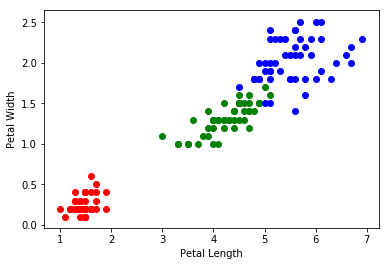

In [8]:
# Create a scatterplot for petal length and petal width
pl = iris.Petal_length
pw = iris.Petal_width

# Create a scatterplot of these two properties using plt.scatter()
# Assign different colors to each data point according to the class it belongs to
plt.scatter(pl[iris.Class == 0], pw[iris.Class == 0], color='red')
plt.scatter(pl[iris.Class == 1], pw[iris.Class == 1], color='green')
plt.scatter(pl[iris.Class == 2], pw[iris.Class == 2], color='blue')
# Specify labels for the X and Y axis
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
# Show graph
plt.show()

## Classifying species

We'll use [scikit-learn's LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to build out classifier.

In [9]:
X = iris.drop('Class', axis=1)
t = iris.Class.values
RANDOM_STATE = 4321

# Use sklean's train_test_plit() method to split our data into two sets.
from sklearn.model_selection import train_test_split

Xtr, Xts, ytr, yts = train_test_split(X, t, random_state=RANDOM_STATE)

In [10]:
# Use the training set to build a LogisticRegression model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(Xtr, ytr) # Fit a logistic regression model

In [11]:
# Use the LogisticRegression's score() method to assess the model accuracy in the training set
lr.score(Xtr, ytr)

0.9553571428571429

In [12]:
# Use the LogisticRegression's score() method to assess the model accuracy in the test set
lr.score(Xts, yts)

0.92105263157894735

## Inspecting classification results

Scores like the one calculated above are usually not what we want to assess. it will only return the mean error obtained between predictions and the actual classes in the training dataset. 

Consider what happens, for instance, when you're training a model to classify if someone has a disease or not and 99% of the people don't have that disease. What can go wrong if you use a score like the one above to evaluate your model? *Hint: What would be the score of a classifier that always returns zero(i.e. it always says that the person doesn't have the disease) in this case?*

Simple score metrics are usually not recommended for classification problems. There are at least three different metrics that are commonly used depending on the context:
* **Precision**: This is the number of true positives that the classifier got right - in the example of the disease classifier, this metric would say how many of the people who it said would have the disease _actually_ have that disease;
* **Recall**: This is the number of true positives that are found by the classifier - in the same example, this metric would tell us how many of the people who actually have the disease were _found_ by the classifier;
* **F1-Score**: This is a weighted sum of precision and recall - it's not easy to interpret its value intuitively, but the idea is that the f1-score represents a compromise between precision and recall;

Some other common evaluation methods for classification models include ROC chart analysis and Area Under Curve (AUC).

*What metric would you prioritise in the case of the disease classifier described before? What are the costs of false positives and false negatives in this case?*

In [13]:
# scikit-learn provides a function called "classification_report" that summarizes the three metrics above
# for a given classification model on a dataset.
from sklearn.metrics import classification_report

# Use this function to print a classification metrics report for the trained classifier.
# See http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
print(classification_report(yts, lr.predict(Xts)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       0.83      0.91      0.87        11
          2       0.92      0.86      0.89        14

avg / total       0.92      0.92      0.92        38



Another useful technique to inspect the results given by a classification model is to take a look at its *confusion matrix*. This is an K x K matrix (where K is the number of distinct classes identified by the classifier) that gives us, in the position **(i, j)**, how many examples belonging to class **i** were classified as belonging to class **j**. 

That can give us insights on which classes may require more attention.

In [14]:
from sklearn.metrics import confusion_matrix

# Use scikit-learn's confusion_matrix to understand which classes were misclassified.
# See http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
confusion_matrix(yts, lr.predict(Xts))

array([[13,  0,  0],
       [ 0, 10,  1],
       [ 0,  2, 12]])

*In the example above, what would you investigate? What classes is the classifier having difficulty to discriminate?*